# Resnet50의 탐색 

In [1]:
from torchvision.models import ResNet50_Weights,resnet50
from torchvision.transforms import Resize,Compose
import torchvision
from torchvision.datasets import ImageNet
from PIL.Image import open
import torch
from warnings import filterwarnings
filterwarnings('ignore')

# Pretrained 모델 저장
weights=ResNet50_Weights.IMAGENET1K_V2

preprocess = weights.transforms()
model=resnet50(weights)
model.eval()
print(model.fc)
# imagenet의 클래스들 불러오고 저장
classes=weights.value.meta['categories']

img=open(r'C:\Users\hyssk\Myopencv\DeepLearningVision\pretrained_model\chicken.jpg')

img_transformed = preprocess(img)
img_transformed = torch.unsqueeze(img_transformed,0)
print(img_transformed.shape)

class_id=torch.argmax(model(img_transformed),dim=1)
prediction=classes[class_id]
prediction

c:\Users\hyssk\anaconda3\envs\pytorch_project\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Linear(in_features=2048, out_features=1000, bias=True)
torch.Size([1, 3, 224, 224])


'cock'

# Diagnostic code 

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


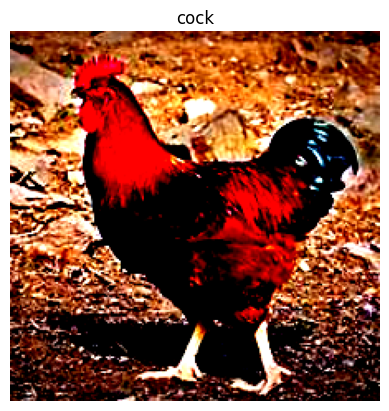

In [3]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(torch.squeeze(img_transformed).permute(1,2,0))
plt.title(prediction)
plt.axis(False)
plt.show()

# stanford 강아지 분류 (전이학습)

# 데이터셋 내부 탐색

In [4]:
from pathlib import Path
import os

file_path = Path(r'C:\Users\hyssk\Myopencv\DeepLearningVision\pretrained_model\images\Images\\')

for dirpath, dirnames, filenames in os.walk(file_path):
    print(f'{dirpath}\n내에 {len(dirnames)}개의 폴더가 있습니다. {len(filenames)}개의 파일이 존재합니다.\n')

file_path

C:\Users\hyssk\Myopencv\DeepLearningVision\pretrained_model\images\Images
내에 120개의 폴더가 있습니다. 0개의 파일이 존재합니다.

C:\Users\hyssk\Myopencv\DeepLearningVision\pretrained_model\images\Images\n02085620-Chihuahua
내에 0개의 폴더가 있습니다. 152개의 파일이 존재합니다.

C:\Users\hyssk\Myopencv\DeepLearningVision\pretrained_model\images\Images\n02085782-Japanese_spaniel
내에 0개의 폴더가 있습니다. 185개의 파일이 존재합니다.

C:\Users\hyssk\Myopencv\DeepLearningVision\pretrained_model\images\Images\n02085936-Maltese_dog
내에 0개의 폴더가 있습니다. 252개의 파일이 존재합니다.

C:\Users\hyssk\Myopencv\DeepLearningVision\pretrained_model\images\Images\n02086079-Pekinese
내에 0개의 폴더가 있습니다. 149개의 파일이 존재합니다.

C:\Users\hyssk\Myopencv\DeepLearningVision\pretrained_model\images\Images\n02086240-Shih-Tzu
내에 0개의 폴더가 있습니다. 214개의 파일이 존재합니다.

C:\Users\hyssk\Myopencv\DeepLearningVision\pretrained_model\images\Images\n02086646-Blenheim_spaniel
내에 0개의 폴더가 있습니다. 188개의 파일이 존재합니다.

C:\Users\hyssk\Myopencv\DeepLearningVision\pretrained_model\images\Images\n02086910-papillon
내에 0개의 폴더가

WindowsPath('C:/Users/hyssk/Myopencv/DeepLearningVision/pretrained_model/images/Images')

# Image_list (확장자가 jpg인 파일들 긁어오기)

img: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x1A879B41F48>
Random image path: C:\Users\hyssk\Myopencv\DeepLearningVision\pretrained_model\images\Images\n02111500-Great_Pyrenees\n02111500_8884.jpg
Image class : n02111500-Great_Pyrenees
Image height:375
Image width:500


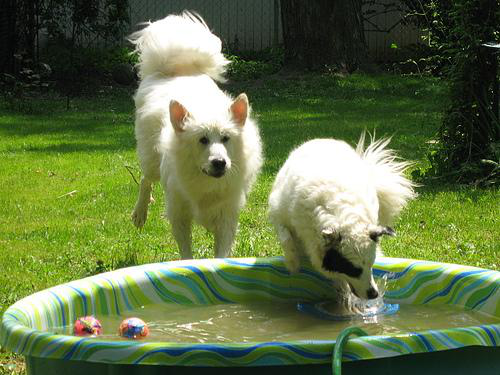

In [5]:
import random
from PIL.Image import open
# jpg 확장자 긁어오기
image_list=list(file_path.glob('*/*.jpg'))

random_image = random.choice(image_list)
random_image_class=random_image.parent.stem

img = open(random_image)
print(f'img: {img}')
# 5. Print metadata
print(f"Random image path: {random_image}")
print(f"Image class : {random_image_class}")
print(f"Image height:{img.height}")
print(f"Image width:{img.width}")
img

# Visualizing our Data (데이터 확인하기)

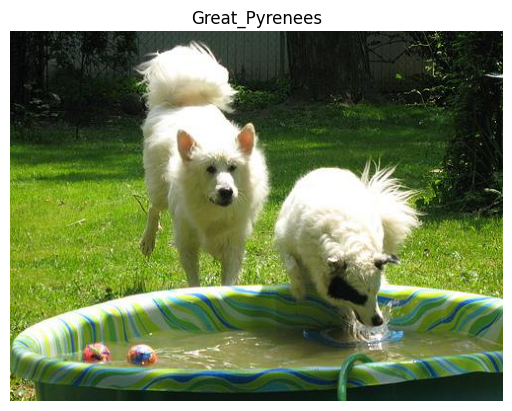

In [6]:
import numpy as np
import matplotlib.pyplot as plt


def image_path_plotting(path:str) -> None:
    img = open(path)
    class_name = Path(path).parent.stem
    img = np.asarray(img)
    plt.figure()
    plt.imshow(img)
    plt.title(class_name.split('-')[1])
    plt.axis(False)
    plt.show()

image_path_plotting(random_image)

# Train dir 과 Test_dir 셋업

In [7]:
# Setup train and testing paths
train_dir=file_path / "train"
test_dir=file_path / "test"


# Transforming Data 데이터 증강

## ImageFolder 를 위한 Splitfolders (클래스 내의 파일을 train과 test로 split)

In [8]:
from torchvision import transforms,datasets
from splitfolders import ratio
from os.path import isdir
data_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomVerticalFlip(0.5),
    transforms.ToTensor()
])

img = open(r'C:\Users\hyssk\Myopencv\DeepLearningVision\pretrained_model\dog.jpg')
transformed_img=data_transform(img)
print(f'img의 shape: {np.asarray(img).shape}')
print(f'data_transform 적용 후 shape: {transformed_img.shape}')

if not isdir(r'C:\Users\hyssk\Myopencv\DeepLearningVision\pretrained_model\output\train'): # train 폴더가 없다면 train,test split 이미지 데이터셋 나누기
    ratio(file_path, output="output", seed=1337, ratio=(.8, .2))

img의 shape: (180, 273, 3)
data_transform 적용 후 shape: torch.Size([3, 224, 224])


120


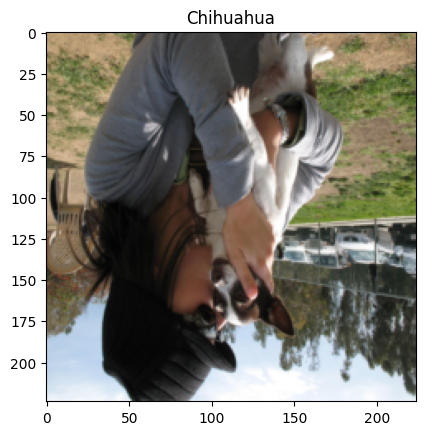

In [9]:
from torchvision.datasets import ImageFolder
train_dir=r'C:\Users\hyssk\Myopencv\DeepLearningVision\pretrained_model\output\train'
test_dir=r'C:\Users\hyssk\Myopencv\DeepLearningVision\pretrained_model\output\val'

train_dataset=ImageFolder(train_dir,
                          data_transform,
                          None)

test_dataset=ImageFolder(test_dir,
                         data_transform)

classes_dog=[i.split('-')[1] for i in train_dataset.classes]
print(len(classes_dog))
# 데이터 확인 및 test_loader의 에러 확인
plt.figure()
plt.imshow(test_dataset[19][0].permute(1,2,0))
plt.title(classes_dog[test_dataset[19][1]])
plt.show()

# DataLoader 만들기 

In [10]:
from torch.utils.data import DataLoader

BATCH_SIZE=32

train_dataloader = DataLoader(train_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=True
                              )
test_dataloader = DataLoader(test_dataset,
                             batch_size=BATCH_SIZE,
                             shuffle=False
                             )

print(next(iter(train_dataloader))[0].shape) # DataLoader 첫번째 배치의 [32,3,224,224] -> [배치사이즈, 채널, 헤이트, 위드스]
print(next(iter(test_dataloader)))
print(len(train_dataloader)) # 514개의 mini_batches


torch.Size([32, 3, 224, 224])
[tensor([[[[0.6353, 0.6118, 0.6078,  ..., 0.5490, 0.5412, 0.5490],
          [0.6745, 0.6471, 0.6353,  ..., 0.5333, 0.5255, 0.5176],
          [0.6941, 0.6745, 0.7137,  ..., 0.5373, 0.5529, 0.5529],
          ...,
          [0.4627, 0.4549, 0.4510,  ..., 0.5725, 0.5843, 0.5882],
          [0.4706, 0.4588, 0.4471,  ..., 0.5569, 0.5647, 0.5647],
          [0.4784, 0.4588, 0.4431,  ..., 0.5373, 0.5490, 0.5451]],

         [[0.4627, 0.4392, 0.4353,  ..., 0.3765, 0.3804, 0.4039],
          [0.5020, 0.4745, 0.4627,  ..., 0.3608, 0.3608, 0.3686],
          [0.5216, 0.5020, 0.5412,  ..., 0.3647, 0.3765, 0.3765],
          ...,
          [0.3020, 0.2941, 0.2902,  ..., 0.3176, 0.3333, 0.3373],
          [0.3098, 0.2980, 0.2863,  ..., 0.3059, 0.3137, 0.3137],
          [0.3176, 0.2980, 0.2824,  ..., 0.2902, 0.3020, 0.2941]],

         [[0.3569, 0.3333, 0.3294,  ..., 0.2784, 0.2784, 0.2980],
          [0.3961, 0.3686, 0.3569,  ..., 0.2627, 0.2588, 0.2588],
          [

In [11]:
# test_loader의 에러 확인
print(next(iter(test_dataloader))[0].shape)

torch.Size([32, 3, 224, 224])


In [12]:
# test_loader의 에러 확인
for X,y in test_dataloader:
    print(y)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])
tensor([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2])
tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3])
tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4])
tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4])
tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5])
tensor([5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6])
tensor([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7,

# Model 생성 및 IMAGENET 이미지넷 데이터셋 pretrained 모델의 classifier의 레이어만 변경

In [13]:
from torch import nn

# resnet50의 fc(layer)를 out_features를 120 (stanford dog 데이터셋의 클래스개수)로 변환
weights=ResNet50_Weights.IMAGENET1K_V2
preprocess = weights.transforms()
model=resnet50(weights)
model.eval()
model.fc=nn.Linear(model.fc.in_features,120)

# 변환된 모델 확인
print(model)
print(model.state_dict())

# 이미 Imagenet
return_to_name=[classes_dog[i] for i in torch.argmax(model(next(iter(train_dataloader))[0]),dim=1)]
return_to_name


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

['Border_collie',
 'Bouvier_des_Flandres',
 'Sealyham_terrier',
 'Airedale',
 'bloodhound',
 'English_setter',
 'Yorkshire_terrier',
 'Border_collie',
 'Afghan_hound',
 'Maltese_dog',
 'Border_collie',
 'Scotch_terrier',
 'beagle',
 'Bedlington_terrier',
 'groenendael',
 'Border_terrier',
 'clumber',
 'flat',
 'Norfolk_terrier',
 'Blenheim_spaniel',
 'standard_schnauzer',
 'Saluki',
 'borzoi',
 'silky_terrier',
 'borzoi',
 'Saluki',
 'clumber',
 'Border_terrier',
 'groenendael',
 'French_bulldog',
 'Great_Dane',
 'bloodhound']

# Imagenet으로 학습된 모델로 정확성 평가

In [14]:
# loss_fn, optimizer
from torch.optim import Adam
from torch.nn import CrossEntropyLoss

loss_fn=CrossEntropyLoss()
optimizer=Adam(model.parameters(),lr=0.001)

In [15]:
next(iter(test_dataloader))

[tensor([[[[0.5451, 0.5490, 0.5373,  ..., 0.4431, 0.4588, 0.4784],
           [0.5647, 0.5647, 0.5569,  ..., 0.4471, 0.4588, 0.4706],
           [0.5882, 0.5843, 0.5725,  ..., 0.4510, 0.4549, 0.4627],
           ...,
           [0.5529, 0.5529, 0.5373,  ..., 0.7137, 0.6745, 0.6941],
           [0.5176, 0.5255, 0.5333,  ..., 0.6353, 0.6471, 0.6745],
           [0.5490, 0.5412, 0.5490,  ..., 0.6078, 0.6118, 0.6353]],
 
          [[0.2941, 0.3020, 0.2902,  ..., 0.2824, 0.2980, 0.3176],
           [0.3137, 0.3137, 0.3059,  ..., 0.2863, 0.2980, 0.3098],
           [0.3373, 0.3333, 0.3176,  ..., 0.2902, 0.2941, 0.3020],
           ...,
           [0.3765, 0.3765, 0.3647,  ..., 0.5412, 0.5020, 0.5216],
           [0.3686, 0.3608, 0.3608,  ..., 0.4627, 0.4745, 0.5020],
           [0.4039, 0.3804, 0.3765,  ..., 0.4353, 0.4392, 0.4627]],
 
          [[0.2549, 0.2588, 0.2471,  ..., 0.1725, 0.1843, 0.2000],
           [0.2745, 0.2745, 0.2627,  ..., 0.1765, 0.1804, 0.1922],
           [0.2980, 0.29

In [16]:
from tqdm.auto import tqdm
model.eval()
test_loss,test_acc=0,0
with torch.inference_mode():
    for index,(X,y) in enumerate(tqdm(test_dataloader)):
        # forward Pass
        test_logits = model(X)

        # calculate loss
        loss = loss_fn(test_logits,y)
        test_loss += loss.item()
        # Calculate the acc
        predicted_label = torch.argmax(test_logits,dim=1)
        test_acc += ((predicted_label==y).sum().item()) / len(predicted_label)

test_acc = test_acc / len(test_dataloader)
test_loss = test_loss / len(test_dataloader)

print(f'test_acc: {(test_acc*100):.3f} | test_loss: {(test_loss*100):.3f}')

100%|██████████| 131/131 [04:42<00:00,  2.15s/it]

test_acc: 0.763 | test_loss: 479.922


예상했다시피, 0.811 % 의 정확도를 보여준다. 

그 이유는 IMAGENET으로 학습된 파라미터로 Stanford Dog 데이터셋을 정확하게 예측하기란 쉽지 않은 것 같다. 

우리는 전이학습을 시킨 뒤에, Stanford Dog 데이터셋을 다시 한번 예측해보자

# 전이 학습 version 1. 

전이 학습 (fully_connected Layer만 학습)

## 모델 프리징 (합성곱 층 동결)

In [17]:
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [18]:
for i, (name,param) in enumerate(model.named_parameters()):
    print(i,name)
    param.requires_grad = False
    if i == 158:
        print('end')
        break

0 conv1.weight
1 bn1.weight
2 bn1.bias
3 layer1.0.conv1.weight
4 layer1.0.bn1.weight
5 layer1.0.bn1.bias
6 layer1.0.conv2.weight
7 layer1.0.bn2.weight
8 layer1.0.bn2.bias
9 layer1.0.conv3.weight
10 layer1.0.bn3.weight
11 layer1.0.bn3.bias
12 layer1.0.downsample.0.weight
13 layer1.0.downsample.1.weight
14 layer1.0.downsample.1.bias
15 layer1.1.conv1.weight
16 layer1.1.bn1.weight
17 layer1.1.bn1.bias
18 layer1.1.conv2.weight
19 layer1.1.bn2.weight
20 layer1.1.bn2.bias
21 layer1.1.conv3.weight
22 layer1.1.bn3.weight
23 layer1.1.bn3.bias
24 layer1.2.conv1.weight
25 layer1.2.bn1.weight
26 layer1.2.bn1.bias
27 layer1.2.conv2.weight
28 layer1.2.bn2.weight
29 layer1.2.bn2.bias
30 layer1.2.conv3.weight
31 layer1.2.bn3.weight
32 layer1.2.bn3.bias
33 layer2.0.conv1.weight
34 layer2.0.bn1.weight
35 layer2.0.bn1.bias
36 layer2.0.conv2.weight
37 layer2.0.bn2.weight
38 layer2.0.bn2.bias
39 layer2.0.conv3.weight
40 layer2.0.bn3.weight
41 layer2.0.bn3.bias
42 layer2.0.downsample.0.weight
43 layer2.0.do

In [19]:
EPOCH=15

for epoch in tqdm(range(EPOCH)): 
    # train mode
    model.train()
    
    # train_loss, train_acc
    train_loss,train_acc=0,0
    
    # 데이터 미니 배치 개수만큼 Train_Loop 돌리기
    for index,(X,y) in enumerate(train_dataloader):
        X,y=X.to(device),y.to(device)
        # Do forward pass
        train_logits = model(X)
        # Calculate loss
        loss = loss_fn(train_logits,y)
        train_loss += loss
        # optimizer zero grad
        optimizer.zero_grad()
        # loss backward
        loss.backward()
        # optimzer.step
        optimizer.step()
        # accuracy 측정
        predicted_label = torch.argmax(train_logits,dim=1)
        train_acc += (predicted_label == y).sum().item() / len(predicted_label)
    
    train_acc = train_acc / len(train_dataloader)
    train_loss = train_loss / len(train_dataloader)

    # Evaluation (test_step)
    model.eval()
    test_loss,test_acc=0,0
    with torch.inference_mode():
        for batch,(X,y) in enumerate(test_dataloader):
            X,y=X.to(device),y.to(device)
            # do forward pass
            X_test = model(X)
            # calculate loss
            test_loss += loss_fn(X_test,y).item()
            # calculate acc
            test_predicted_label = torch.argmax(X_test,dim=1)
            test_acc += ((test_predicted_label==y).sum().item()) / len(test_predicted_label)
        test_loss = test_loss / len(test_dataloader)
        test_acc = test_acc / len(test_dataloader)

100%|██████████| 15/15 [26:32<00:00, 106.15s/it]


# Model 의 성능 평가 

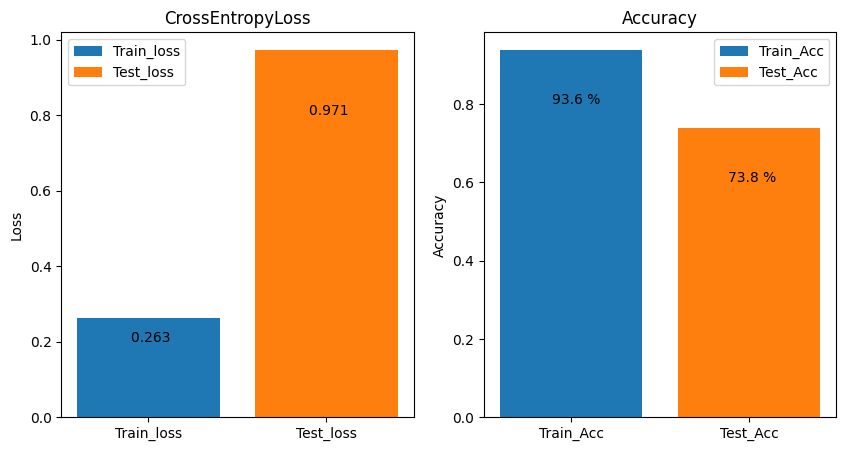

In [20]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.bar(x='Train_loss',height=train_loss.item(),label='Train_loss')
plt.bar(x='Test_loss',height=test_loss,label='Test_loss')
plt.title('CrossEntropyLoss')
plt.ylabel('Loss')
plt.text(-0.1,0.2,f'{(train_loss):.3f}  ')
plt.text(0.9,0.8,f'{test_loss:.3f} ')
plt.legend()

plt.subplot(1,2,2)
plt.bar(x='Train_Acc',height=train_acc,label='Train_Acc')
plt.bar(x='Test_Acc',height=test_acc,label='Test_Acc')
plt.legend()
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.text(-0.11,0.8,f'{(train_acc*100):.1f} % ')
plt.text(0.88,0.6,f'{test_acc*100:.1f} %')
plt.show()

Model Freezing을 통해 0.811 % 정확도에서 73.3% 의 정확도까지 끌어올렸다.

# 모델 예측

모델에 10개의 컬러이미지 입력 후 예측하고 얼마나 잘 예측했는지 평가

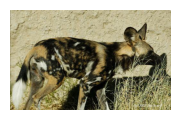

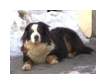

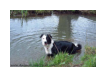

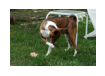

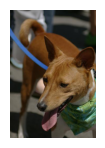

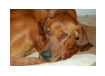

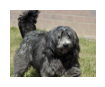

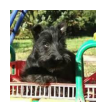

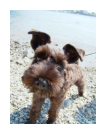

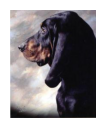

In [21]:
import random

val_path=Path(r'C:\Users\hyssk\Myopencv\DeepLearningVision\pretrained_model\output\val\\')
val_image_list=list(val_path.glob('*/*.jpg'))

random_val_image_list=random.choices(val_image_list,k=10)

plt.figure(figsize=(12,12))
for i,val_img_path in enumerate(random_val_image_list):
    img = open(val_img_path)
    img = np.asarray(img)
    plt.subplot(2,5,i+1)
    plt.imshow(img)
    plt.axis(False)
    plt.show()